In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
time = ctrl.Consequent(np.arange(0, 31, 1), 'time')
dust = ctrl.Antecedent(np.arange(0, 11, 1), 'dust')
cloth = ctrl.Antecedent(np.arange(0, 11, 1), 'cloth')

time['v_low']=fuzz.trimf(time.universe, [0, 0, 5])
time['low']=fuzz.trimf(time.universe, [5, 5, 10])
time['s_low']=fuzz.trimf(time.universe, [10, 10, 15])
time['medium']=fuzz.trimf(time.universe, [0, 15, 30])
time['s_high']=fuzz.trimf(time.universe, [15, 20, 20])
time['high']=fuzz.trimf(time.universe, [20, 25, 25])
time['v_high']=fuzz.trimf(time.universe, [25, 30, 30])

dust['low']=fuzz.trimf(dust.universe, [0, 0, 5])
dust['medium']=fuzz.trimf(dust.universe, [0, 5, 10])
dust['high']=fuzz.trimf(dust.universe, [5, 10, 10])

cloth['soft']=fuzz.trimf(cloth.universe, [0, 0, 5])
cloth['medium']=fuzz.trimf(cloth.universe, [0, 5, 10])
cloth['hard']=fuzz.trimf(cloth.universe, [5, 10, 10])

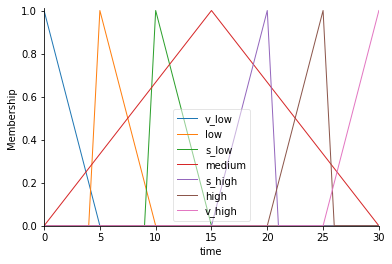

In [3]:
time.view()

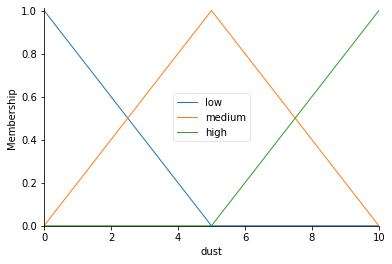

In [4]:
dust.view()

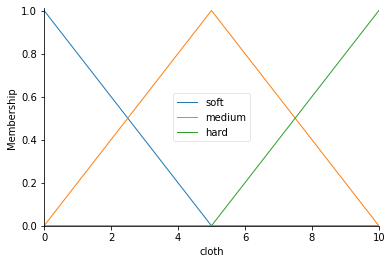

In [5]:
cloth.view()

In [6]:
rule1 = ctrl.Rule(dust['low'] & cloth['soft'], time['v_low'])
rule2 = ctrl.Rule(dust['low'] & cloth['medium'], time['low'])
rule3 = ctrl.Rule(dust['low'] & cloth['hard'], time['s_low'])
rule4 = ctrl.Rule(dust['medium'] & cloth['soft'], time['s_low'])
rule5 = ctrl.Rule(dust['medium'] & cloth['medium'], time['medium'])
rule6 = ctrl.Rule(dust['medium'] & cloth['hard'], time['s_high'])
rule7 = ctrl.Rule(dust['high'] & cloth['soft'], time['s_high'])
rule8 = ctrl.Rule(dust['high'] & cloth['medium'], time['high'])
rule9 = ctrl.Rule(dust['high'] & cloth['hard'], time['v_high'])

In [7]:
problem_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])

In [8]:
solve = ctrl.ControlSystemSimulation(problem_ctrl)

28.333333333333332


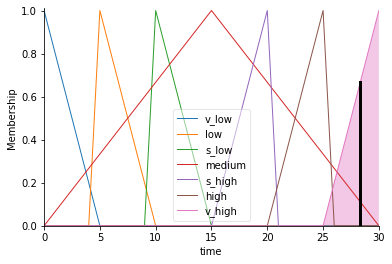

In [9]:
solve.input['dust'] = 10
solve.input['cloth'] = 10

solve.compute()

print(solve.output['time'])
time.view(sim=solve)